In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# df1 = pd.read_csv('/content/drive/MyDrive/Практикум 3 семестр/датасет/датасет_new.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Практикум 3 семестр/датасет/словарь_соцдема.csv')

df1 = pd.read_csv('../../data/часть_датасета_100к.csv')
df2 = pd.read_csv('../../data/словарь_соцдема.csv')

In [7]:
df1.head()

,Дата и время события,Экран,Функционал,Действие,Идентификатор устройства,Номер сессии в рамках устройства,Производитель устройства,Модель устройства,Тип устройства,ОС
0,2025-09-29T10:20:27+03:00[Europe/Moscow],Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
1,2025-09-29T10:20:27+03:00[Europe/Moscow],Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
2,2025-09-29T10:21:56+03:00[Europe/Moscow],Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
3,2025-09-29T10:21:56+03:00[Europe/Moscow],Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
4,2025-09-29T10:22:01+03:00[Europe/Moscow],Еще,Переход в раздел 'Заявки',Тап на кнопку 'Заявки',339,10000000009,Redmi,Redmi Note 12,phone,Android


In [8]:
df2.head()

,number,age_back,gender
0,64,44.0,М
1,65,47.0,М
2,66,53.0,Ж
3,67,39.0,М
4,68,54.0,Ж


In [24]:
from datetime import datetime

df1['Дата и время события']=df1['Дата и время события'].apply(lambda x: x.split("[")[0])
df1['Дата и время события'] = df1['Дата и время события'].apply(lambda x: datetime.fromisoformat(x))

max, min = df1['Дата и время события'].max(), df1['Дата и время события'].min()
PERIOD_FROM = min
PERIOD_UNTIL = max
CHURN_DAYS = 31

print(f"Данные за период с {PERIOD_FROM} по {PERIOD_UNTIL}")
print(f"Пользователь считается ушедшим после {CHURN_DAYS} дней")

Данные за период с 2025-09-01 00:15:35+03:00 по 2025-10-25 23:55:48+03:00
Пользователь считается ушедшим после 31 дней


In [25]:
all_lines = df1.shape[0]
duplicats = df1.duplicated().sum()

all_lines2 = df2.shape[0]
duplicats2 = df2.duplicated().sum()

print(f"Из {all_lines} строк в датафрейме 1, дубликатов {duplicats}")
print(f"Из {all_lines2} строк в датафрейме 2, дубликатов {duplicats2}")

Из 99999 строк в датафрейме 1, дубликатов 46159
Из 180341 строк в датафрейме 2, дубликатов 0


In [26]:
#удалим дубликаты
df1 = df1.drop_duplicates()

all_lines = df1.shape[0]
print(f"{all_lines} строк осталось после удаления дубликатов.")

53840 строк осталось после удаления дубликатов.


In [27]:
quantity1 = df1['Идентификатор устройства'].nunique()
quantity2 = df2['number'].nunique()

print(f'Уникальных устройств в первом датасете {quantity1}, уникальных устройств во втором датасете {quantity2}')

Уникальных устройств в первом датасете 8918, уникальных устройств во втором датасете 180341


In [28]:
mask_missing = ~df1["Идентификатор устройства"].isin(df2["number"])
missing_ids = df1.loc[mask_missing, "Идентификатор устройства"].unique()

num_lost = len(missing_ids)
print(f"Количество устройств, присутствующих в первом датафрейме, но отсутствующих во втором: {num_lost}")

Количество устройств, присутствующих в первом датафрейме, но отсутствующих во втором: 0


In [29]:
df2 = df2.rename(columns={'number': 'Идентификатор устройства'})
df2.columns.tolist()

['Идентификатор устройства', 'age_back', 'gender']

In [30]:
cols_to_add = ['Идентификатор устройства', 'age_back', 'gender']

df = df1.merge(
    df2[cols_to_add],
    on='Идентификатор устройства',
    how='left'
)
df.head()

,Дата и время события,Экран,Функционал,Действие,Идентификатор устройства,Номер сессии в рамках устройства,Производитель устройства,Модель устройства,Тип устройства,ОС,age_back,gender
0,2025-09-29 10:20:27+03:00,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
1,2025-09-29 10:21:56+03:00,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
2,2025-09-29 10:22:01+03:00,Еще,Переход в раздел 'Заявки',Тап на кнопку 'Заявки',339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
3,2025-09-29 10:23:49+03:00,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
4,2025-09-29 10:20:17+03:00,Новая заявка,Выбор квартиры,Тап на квартиру,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж


In [31]:
#заменим NaN в столбце Действие на "Переход к экрану", NaN в столбце gender на "Неизвестен", NaN в столбце age_back на -1

df['Действие'] = df['Действие'].fillna("Переход к экрану")
df['gender'] = df['gender'].fillna("Неизвестен")
df['age_back'] = df['age_back'].fillna(-1)

In [32]:
df.isna().sum()

Дата и время события                0
Экран                               0
Функционал                          0
Действие                            0
Идентификатор устройства            0
Номер сессии в рамках устройства    0
Производитель устройства            0
Модель устройства                   0
Тип устройства                      0
ОС                                  0
age_back                            0
gender                              0
dtype: int64

In [33]:
#дата и время первого и последнего действия в приложении для каждого пользователя

user_activity = df.groupby('Идентификатор устройства')['Дата и время события'] \
                  .agg(['min', 'max']) \
                  .rename(columns={'min': 'first_event', 'max': 'last_event'})
user_activity

,first_event,last_event
Идентификатор устройства,,
1,2025-10-16 16:25:27+03:00,2025-10-25 08:40:39+03:00
2,2025-09-19 20:38:56+03:00,2025-10-20 11:45:48+03:00
3,2025-10-20 13:26:34+03:00,2025-10-20 13:34:50+03:00
4,2025-10-20 17:35:28+03:00,2025-10-20 17:35:46+03:00
5,2025-10-20 12:41:02+03:00,2025-10-20 12:41:05+03:00
...,...,...
20708,2025-09-22 18:56:38+03:00,2025-09-22 22:48:46+03:00
20709,2025-09-22 13:23:29+03:00,2025-09-22 13:23:40+03:00
20710,2025-09-22 14:24:27+03:00,2025-09-22 14:24:27+03:00


In [34]:
#пользователи, которые ушли из приложения (не пользовались 30+ дней)
users_left_app = user_activity[user_activity['last_event']<="2025-09-30 23:59:59+03:00"]
users_left_app = users_left_app.reset_index()

In [ ]:
users_left_app

,Идентификатор устройства,first_event,last_event
0,196,2025-09-01 21:06:55+03:00,2025-09-29 10:25:27+03:00
1,199,2025-09-29 10:40:04+03:00,2025-09-30 00:11:27+03:00
2,200,2025-09-04 19:14:27+03:00,2025-09-29 21:28:50+03:00
3,202,2025-09-20 09:10:45+03:00,2025-09-29 10:50:56+03:00
4,206,2025-09-23 06:30:18+03:00,2025-09-29 11:18:36+03:00
...,...,...,...
59198,180284,2025-09-18 15:59:41+03:00,2025-09-18 15:59:51+03:00
59199,180285,2025-09-13 15:43:09+03:00,2025-09-13 15:43:15+03:00
59200,180286,2025-09-13 17:56:23+03:00,2025-09-13 21:53:34+03:00
59201,180287,2025-09-13 17:50:23+03:00,2025-09-13 17:53:36+03:00


In [35]:
#добавим столбец 'Ушел из приложения'
df['Ушел из приложения'] = df['Идентификатор устройства'].isin(
    users_left_app['Идентификатор устройства']
).astype(int)

In [36]:
df_left = df[df['Ушел из приложения'] == 1]
df_use = df[df['Ушел из приложения'] == 0]

bins = [18, 25, 31, 41, 51, 61, 71, 101]
labels = ['18–24', '25–30', '31-40', '41–50', '51–60', '61–70', '71–101']

df_left['age_group'] = pd.cut(df_left['age_back'], bins=bins, labels=labels, right=True, include_lowest=True)
df_use['age_group'] = pd.cut(df_use['age_back'], bins=bins, labels=labels, right=True, include_lowest=True)

/tmp/ipykernel_21180/2864565393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['age_group'] = pd.cut(df_left['age_back'], bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipykernel_21180/2864565393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['age_group'] = pd.cut(df_use['age_back'], bins=bins, labels=labels, right=True, include_lowest=True)


In [37]:
left_counts = df_left['age_group'].value_counts().sort_index()
stay_counts = df_use['age_group'].value_counts().sort_index()

# Общее количество пользователей в группе
total_counts = left_counts + stay_counts

# Доля ушедших
share_left = left_counts / total_counts
(share_left * 100).round(2)

age_group
18–24     44.24
25–30     33.34
31-40     35.28
41–50     35.78
51–60     34.06
61–70     36.02
71–101    31.48
Name: count, dtype: float64

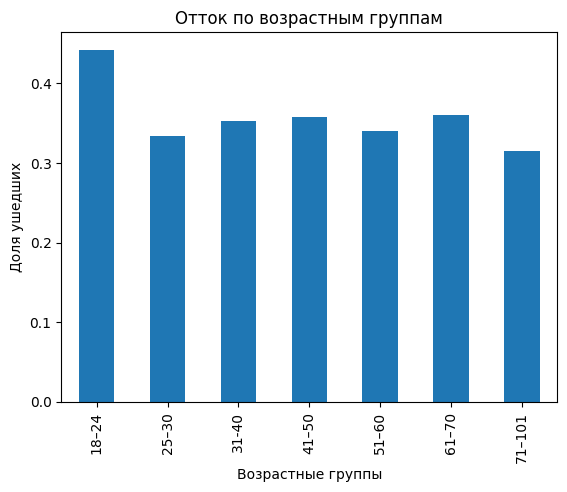

In [38]:
import matplotlib.pyplot as plt

share_left.plot(kind='bar')
plt.ylabel('Доля ушедших')
plt.xlabel('Возрастные группы')
plt.title('Отток по возрастным группам')
plt.show()

In [39]:
left_counts = df_left['gender'].value_counts().sort_index()
stay_counts = df_use['gender'].value_counts().sort_index()

total_counts = left_counts + stay_counts
share_left = ((left_counts / total_counts)*100).round(2)
share_left

gender
Ж             34.49
М             36.24
Неизвестен    31.54
Name: count, dtype: float64

In [40]:
left_counts = df_left['ОС'].value_counts().sort_index()
stay_counts = df_use['ОС'].value_counts().sort_index()

total_counts = left_counts + stay_counts
share_left = ((left_counts / total_counts)*100).round(2)
share_left

ОС
Android    33.03
iOS        37.85
Name: count, dtype: float64

In [41]:
left_counts = df_left['Тип устройства'].value_counts().sort_index()
stay_counts = df_use['Тип устройства'].value_counts().sort_index()

total_counts = left_counts + stay_counts

share_left = (left_counts / total_counts * 100)
share_left = share_left.fillna(0).round(2)
(share_left.sort_values(ascending=False)).head(5)

Тип устройства
tablet    40.32
phone     35.16
Name: count, dtype: float64

In [42]:
#выявляем потенциально проблемные модели устройств

left_counts = df_left['Модель устройства'].value_counts().sort_index()
stay_counts = df_use['Модель устройства'].value_counts().sort_index()

# Общий набор моделей
idx = left_counts.index.union(stay_counts.index)

# Выравниваем индексы и заполняем отсутствующие значения нулями
left_counts = left_counts.reindex(idx, fill_value=0)
stay_counts = stay_counts.reindex(idx, fill_value=0)

total_counts = left_counts + stay_counts

share_left = (left_counts / total_counts * 100).round(2)

# Собираем всё в таблицу
models_stats = pd.DataFrame({
    'Ушли': left_counts,
    'Остались': stay_counts,
    'Всего пользователей данной модели': total_counts,
    'Сколько процентов с такой моделью ушли': share_left
})

models_stats_filtered = models_stats[models_stats['Всего пользователей данной модели'] >= 4000]
models_stats_sorted = models_stats_filtered.sort_values('Сколько процентов с такой моделью ушли', ascending=False)

models_stats_sorted.head(20)

,Ушли,Остались,Всего пользователей данной модели,Сколько процентов с такой моделью ушли
Модель устройства,,,,


In [43]:
#общие цепочки
chains = df.sort_values(["Идентификатор устройства", 'Номер сессии в рамках устройства', 'Дата и время события'])

In [44]:
#последние активности во всех сессиях
last_in_session = chains.groupby(['Идентификатор устройства', 'Номер сессии в рамках устройства']).tail(1)

In [45]:
#цепочки только покинувших приложение

chains_left = df_left.sort_values(["Идентификатор устройства", 'Номер сессии в рамках устройства', 'Дата и время события'])

#последние действия, после кот. пользователи делали приложению ручкой
last_sessions = chains_left.groupby('Идентификатор устройства').tail(1)

In [46]:
visits = df['Экран'].value_counts() #всего посещений всех экранов
visits_pct = (visits / visits.sum() * 100).round(2) #какая часть всех экранных просмотров приходится на каждый экран


last = last_sessions['Экран'].value_counts() #сколько раз каждый экран стал последним
last_pct = (last / last.sum() * 100).round(2)

comparison = (
    pd.DataFrame({
        'visits': visits,
        'visits_pct': visits_pct,
        'last': last,
        'last_pct': last_pct
    })
    .fillna(0)
    .sort_values('last_pct', ascending=False)
)
#введем индекс "уходоопасности" (показывает, насколько чаще экран становится последним, чем можно ожидать в норме)
comparison['over_index'] = (comparison['last_pct'] / comparison['visits_pct']).round(2)

In [47]:
#все, что больше единицы - аномалия. выведем все что больше 1.30 - очевидные аномалии
comparison[comparison['over_index']>1.30]

,visits,visits_pct,last,last_pct,over_index
Экран,,,,,
Еще,28804,53.50,3084.0,73.18,1.37
Важное,4133,7.68,525.0,12.46,1.62
Связаться с владельцем ТС,144,0.27,30.0,0.71,2.63


- node_id: hash(screen + feature) идентификатор ноды (функционала).
- event_dt: Дата и время события (datetime)
- screen - Экран
- feature - Функционал
- action - Действие
- device_id - Идентификатор устройства
- session_id - Номер сессии в рамках устройства
- device_vendor - Производитель устройства
- device_model - Модель устройства
- device_type - Тип устройства
- os - ОС
- age - Возраст
- gender - Пол
- is_churn - Из этой ноды вышли и "никогда" не вернулись
- is_bounce - это последняя нода визита

In [48]:
df.columns.tolist()

['Дата и время события',
 'Экран',
 'Функционал',
 'Действие',
 'Идентификатор устройства',
 'Номер сессии в рамках устройства',
 'Производитель устройства',
 'Модель устройства',
 'Тип устройства',
 'ОС',
 'age_back',
 'gender',
 'Ушел из приложения']

In [49]:
df_renamed = df.rename(columns={'Дата и время события': 'event_dt', 'Экран': 'screen', 'Функционал': 'feature', 'Действие': 'action',
                                'Идентификатор устройства': 'device_id', 'Номер сессии в рамках устройства': 'session_id',
 'Производитель устройства': 'device_vendor', 'Модель устройства': 'device_model', 'Тип устройства': 'device_type', 'ОС': 'os', 'age_back': 'age', 'Ушел из приложения': 'is_churn'})

In [50]:
import hashlib

df_renamed['node_id'] = (df_renamed['screen'] + '_' + df_renamed['feature']).apply(lambda x: hashlib.md5(x.encode()).hexdigest())

In [51]:
df_renamed['is_finish'] = 0
df_renamed.loc[last_in_session.index, 'is_finish'] = 1

In [52]:
df_renamed

,event_dt,screen,feature,action,device_id,session_id,device_vendor,device_model,device_type,os,age,gender,is_churn,node_id,is_finish
0,2025-09-29 10:20:27+03:00,Еще,Открытие экрана,Переход к экрану,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,875e50d28d26088a760866c1125ff124,0
1,2025-09-29 10:21:56+03:00,Еще,Открытие экрана,Переход к экрану,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,875e50d28d26088a760866c1125ff124,0
2,2025-09-29 10:22:01+03:00,Еще,Переход в раздел 'Заявки',Тап на кнопку 'Заявки',339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,5281fb229131fa372bd15589fed81bc7,0
3,2025-09-29 10:23:49+03:00,Еще,Открытие экрана,Переход к экрану,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,875e50d28d26088a760866c1125ff124,1
4,2025-09-29 10:20:17+03:00,Новая заявка,Выбор квартиры,Тап на квартиру,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,e9c334108c17d0d6014b73f196b775f4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53835,2025-09-29 22:59:11+03:00,Новая заявка,Выбор через теги,Переход к экрану,3618,10000000093,Redmi,Redmi Note 12 Pro,phone,Android,47.0,Ж,1,38295c4cb820734391afed2c6eab0a22,0
53836,2025-09-29 22:59:08+03:00,Новая заявка,Возврат на предыдущий этап,Тап на стрелку назад,3618,10000000093,Redmi,Redmi Note 12 Pro,phone,Android,47.0,Ж,1,cc371a551e51bfd9ecf88fb117f19012,0
53837,2025-09-29 22:59:03+03:00,Новая заявка,Выбор через теги,Переход к экрану,3618,10000000093,Redmi,Redmi Note 12 Pro,phone,Android,47.0,Ж,1,38295c4cb820734391afed2c6eab0a22,0
53838,2025-09-29 22:59:00+03:00,Новая заявка,Возврат на предыдущий этап,Тап на стрелку назад,3618,10000000093,Redmi,Redmi Note 12 Pro,phone,Android,47.0,Ж,1,cc371a551e51bfd9ecf88fb117f19012,0


In [ ]:
df_renamed.to_csv('clean_data.csv')

## Юнит-тесты

1. Провека шагов отмеченных как отток
2. Проверка что шаги оттока всегда финишные
3. Проверка что финишные шаги не всегда оттока
4. Проверка шагов отмеченных как не отток
5. Проверка шагов отмеченных как финишные
6. Проверка шагов отмеченных как не финишные

### 1. Провека шагов отмеченных как отток
Мы ожидаем, что `is_churn=True` отмечен только тот шаг, после которого спустя > CHURN_DAYS нет ни одного его device_id.
Следовательно наоборот, если мы найдём 2 шага (условно s1 и s2), где:
- s1.device_id == s2.device_id
- s1 отмечен как `is_churn=True`
- s1.event_dt < s2.event_dt
- s2.event_dt - s1.event_dt <= CHURN_DAYS

То такая находка будет говорить о не корректности простановки флага is_churn.


In [66]:
df = df_renamed.sort_values(["device_id", "event_dt"])

violations = []

churn_steps = df[df["is_churn"] == True]

for _, s1 in churn_steps.iterrows():
    s2 = df[
        (df["device_id"] == s1["device_id"]) &
        (df["event_dt"] > s1["event_dt"]) &
        ((df["event_dt"] - s1["event_dt"]).dt.days <= CHURN_DAYS)
    ]

    if not s2.empty:
        violations.append({
            "device_id": s1["device_id"],
            "event_dt": s1["event_dt"],
            "screen": s1["screen"],
            "feature": s1["feature"],
            "is_churn": s1["is_churn"],
        })
        violations.append({
            "device_id": s2.iloc[0]["device_id"],
            "event_dt": s2.iloc[0]["event_dt"],
            "screen": s2.iloc[0]["screen"],
            "feature": s2.iloc[0]["feature"],
            "is_churn": s2.iloc[0]["is_churn"],
        })
        break

assert not violations, f"Найдены некорректные is_churn шаги: {violations}"
print("Тест пройден успешно 👌.")


AssertionError: Найдены некорректные is_churn шаги: [{'device_id': 196, 'event_dt': Timestamp('2025-09-01 21:06:55+0300', tz='UTC+03:00'), 'screen': 'Еще', 'feature': 'Открытие экрана', 'is_churn': 1}, {'device_id': np.int64(196), 'event_dt': Timestamp('2025-09-01 21:07:11+0300', tz='UTC+03:00'), 'screen': 'Еще', 'feature': 'Открытие экрана', 'is_churn': np.int64(1)}]

### 2. Проверка что шаги оттока всегда финишные

Очевидно, что раз пользователь уходит на месяц+ после некоторого шага, то этот шаг так же является финишным.
Если найдём шаг, который `is_churn=True` и `is_finish=False`, то это ошибка.

In [65]:
invalid = df_renamed[
    (df_renamed["is_churn"] == True) &
    (df_renamed["is_finish"] == False)
]

assert invalid.empty, (
    "Найдены шаги с is_churn=True и is_finish=False:\n"
    f"{invalid[['device_id', 'event_dt', 'screen', 'feature', 'is_churn', 'is_finish']].head()}"
)

print("Тест пройден успешно 👌.")

AssertionError: Найдены шаги с is_churn=True и is_finish=False:
    device_id                  event_dt screen                    feature  \
12        343 2025-09-29 20:13:37+03:00    Еще            Открытие экрана   
13        343 2025-09-29 20:13:38+03:00    Еще  Переход в раздел 'Заявки'   
14        343 2025-09-29 20:15:07+03:00    Еще            Открытие экрана   
15        343 2025-09-29 20:15:10+03:00    Еще  Переход в раздел 'Услуги'   
16        343 2025-09-29 20:15:17+03:00    Еще            Открытие экрана   

    is_churn  is_finish  
12         1          0  
13         1          0  
14         1          0  
15         1          0  
16         1          0  

### 3. Проверка что финишные шаги не всегда оттока

А вот наоборот не всегда верно. У нас точно будут шаги `is_churn=False` и `is_finish=True`. Если таких не нашлось - ошибка.

In [67]:
valid = df_renamed[
    (df_renamed["is_churn"] == False) &
    (df_renamed["is_finish"] == True)
]

assert not valid.empty, (
    "Не найдено ни одного шага с is_finish=True и is_churn=False — "
    "финишные шаги всегда помечены как отток, что неверно"
)

print("Тест пройден успешно 👌.")


Тест пройден успешно 👌.


### 4. Проверка шагов отмеченных как не отток

Если шаг отмечен как отток, то очевидно, что он должен быть не раньше конца датасета минус `CHURN_DAYS` дней, либо впереди есть другой шаг того же устройства за меньше чем `CHURN_DAYS` дней

Ещё раз условия ошибки:
- s1.is_churn=False
- PERIOD_UNTIL - `event_dt` > CHURN_DAYS
- (!) `И`
- Нет такого s2, который s2.event_dt > s1.event_dt && s2.event_dt - s1.event_dt <= CHURN_DAYS

! Внимание: `я мог напортачить в этом тесте. Сложна.`

In [76]:
import pandas as pd

df = df_renamed.sort_values(["device_id", "event_dt"])

violations = []

non_churn_steps = df[df["is_churn"] == False]

for _, s1 in non_churn_steps.iterrows():
    # если шаг слишком далеко от конца периода
    if (PERIOD_UNTIL - s1["event_dt"]).days > CHURN_DAYS:
        # ищем следующий шаг этого же устройства в пределах CHURN_DAYS
        s2 = df[
            (df["device_id"] == s1["device_id"]) &
            (df["event_dt"] > s1["event_dt"]) &
            ((df["event_dt"] - s1["event_dt"]).dt.days <= CHURN_DAYS)
        ]

        if s2.empty:
            violations.append({
                "device_id": s1["device_id"],
                "event_dt": s1["event_dt"],
                "screen": s1["screen"],
                "feature": s1["feature"],
            })
            break

assert not violations, f"Найдены некорректные шаги с is_churn=False: {violations}"
print("Тест пройден успешно 👌.")


AssertionError: Найдены некорректные шаги с is_churn=False: [{'device_id': 24, 'event_dt': Timestamp('2025-09-01 18:58:18+0300', tz='UTC+03:00'), 'screen': 'Еще', 'feature': 'Открытие экрана'}]

### 5. Проверка шагов отмеченных как финишные
Проверить что нет s1 и s2, которые:
- s1.is_finish == True
- s2.event_dt > s1.event_dt
- s2.device_id == s1.device_id
- s2.session_id == s1.session_id

In [77]:
df = df_renamed.sort_values(["device_id", "session_id", "event_dt"])

violations = []

finish_steps = df[df["is_finish"] == True]

for _, s1 in finish_steps.iterrows():
    s2 = df[
        (df["device_id"] == s1["device_id"]) &
        (df["session_id"] == s1["session_id"]) &
        (df["event_dt"] > s1["event_dt"])
    ]

    if not s2.empty:
        violations.append({
            "device_id": s1["device_id"],
            "session_id": s1["session_id"],
            "finish_event_dt": s1["event_dt"],
            "next_event_dt": s2.iloc[0]["event_dt"],
        })
        break

assert not violations, f"Найдены некорректные финишные шаги: {violations}"
print("Тест пройден успешно 👌.")


Тест пройден успешно 👌.


### 6. Проверка шагов отмеченных как не финишные
Ошибка, если не найден ни один шаг s2, который по отношению к s1:
- s1.is_finish == False
- s2.event_dt > s1.event_dt
- s2.device_id == s1.device_id
- s2.session_id == s1.session_id

In [ ]:
df = df_renamed.sort_values(["device_id", "session_id", "event_dt"])

violations = []

non_finish_steps = df[df["is_finish"] == False]

for _, s1 in non_finish_steps.iterrows():
    s2 = df[
        (df["device_id"] == s1["device_id"]) &
        (df["session_id"] == s1["session_id"]) &
        (df["event_dt"] > s1["event_dt"])
    ]

    if s2.empty:
        violations.append({
            "device_id": s1["device_id"],
            "session_id": s1["session_id"],
            "event_dt": s1["event_dt"],
            "screen": s1["screen"],
            "feature": s1["feature"],
        })
        break

assert not violations, f"Найдены некорректные шаги с is_finish=False: {violations}"
print("Тест пройден успешно 👌.")


AssertionError: Найдены некорректные шаги с is_finish=False: [{'device_id': 2, 'session_id': 10000000065, 'event_dt': Timestamp('2025-09-19 20:39:32+0300', tz='UTC+03:00'), 'screen': 'Еще', 'feature': "Переход в раздел 'Заявки'"}]

### TODO: поразмышлять.
- В логах часто повторяются одни и те же действия при том, что время отличается. Это точно повторные нажания или это особенности логирования?